## make the dataset for training growth rate

In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import h5py

import sys
sys.path.append('../../../src')
from viz import show_images
from PlumeDataset import plume_dataset
from AutoAlign import align_plumes
from Velocity import VelocityCalculator
from PlumeMetrics import PlumeMetrics

sys.path.append('../../../src/DL')
from make_dataset import make_dataset, EqualRangeNormalizer

### load growth rate

In [2]:
df_condition = pd.read_excel('../../../../../OneDrive - Drexel University/PLD_SrRuO3/SrRuO3 growth/Sample log.xlsx', 
                             sheet_name='SRO', engine='openpyxl')
df_condition = df_condition.loc[16:33, ['Growth', 'Pressure (mTorr)', 'Fluence (J/cm2)', 'Growth rate (Å/pulse)', 'Pulse number', 'Growth rate (nm/min)']]
df_condition.replace('2 to 1.73', (2+1.73)/2, inplace=True)
df_condition = df_condition.dropna(subset=['Growth rate (Å/pulse)', 'Growth rate (nm/min)'])
df_condition['Growth'] = df_condition['Growth'].str.replace('LYW_YCG', 'YG')
df_condition

,Growth,Pressure (mTorr),Fluence (J/cm2),Growth rate (Å/pulse),Pulse number,Growth rate (nm/min)
16,YG045,75.0,1.692857,0.026700,10000.0,1.60000
17,YG046,75.0,1.865000,0.030875,8000.0,1.80000
18,YG047,75.0,2.050000,0.112000,6000.0,6.70000
22,YG051,75.0,2.050000,0.098033,6000.0,2.94100
24,YG053,75.0,1.600000,0.056600,7000.0,1.69700
27,YG056,100.0,1.600000,0.052600,7000.0,1.57700
28,YG057,75.0,1.230000,0.047286,7000.0,1.41857
29,YG058,125.0,1.600000,0.054000,12000.0,1.62500
30,YG059,50.0,1.600000,0.057600,10000.0,1.72800
31,YG060,75.0,0.800000,0.019000,10000.0,0.57000


### load plumes

In [3]:
growth_names = list(df_condition['Growth'].unique())
print(growth_names)

growth_name_dict = {g: i for i, g in enumerate(growth_names)}
print(growth_name_dict)

['YG045', 'YG046', 'YG047', 'YG051', 'YG053', 'YG056', 'YG057', 'YG058', 'YG059', 'YG060', 'YG061', 'YG062']
{'YG045': 0, 'YG046': 1, 'YG047': 2, 'YG051': 3, 'YG053': 4, 'YG056': 5, 'YG057': 6, 'YG058': 7, 'YG059': 8, 'YG060': 9, 'YG061': 10, 'YG062': 11}


In [4]:
files = []
for key in growth_names:
    files.append(glob.glob(f'../../../datasets/SRO_STO_Drexel/*{key}*.h5')[0])
files

['../../../datasets/SRO_STO_Drexel\\YG045_YichenGuo_JulianGoddy_05092024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG046_YichenGuo_05162024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG047_YichenGuo_05172024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG051_YichenGuo_06122024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG053_YichenGuo_06172024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG056_YichenGuo_06282024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG057_YichenGuo_06282024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG058_YichenGuo_06292024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG059_YichenGuo_07012024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG060_YichenGuo_07032024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG061_YichenGuo_07042024.h5',
 '../../../datasets/SRO_STO_Drexel\\YG062_YichenGuo_07052024.h5']

In [5]:
files_train = ['../../../datasets/SRO_STO_Drexel\\YG045_YichenGuo_JulianGoddy_05092024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG046_YichenGuo_05162024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG047_YichenGuo_05172024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG051_YichenGuo_06122024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG053_YichenGuo_06172024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG057_YichenGuo_06282024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG058_YichenGuo_06292024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG059_YichenGuo_07012024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG060_YichenGuo_07032024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG061_YichenGuo_07042024.h5',
                '../../../datasets/SRO_STO_Drexel\\YG062_YichenGuo_07052024.h5']

files_test = ['../../../datasets/SRO_STO_Drexel\\YG056_YichenGuo_06282024.h5']

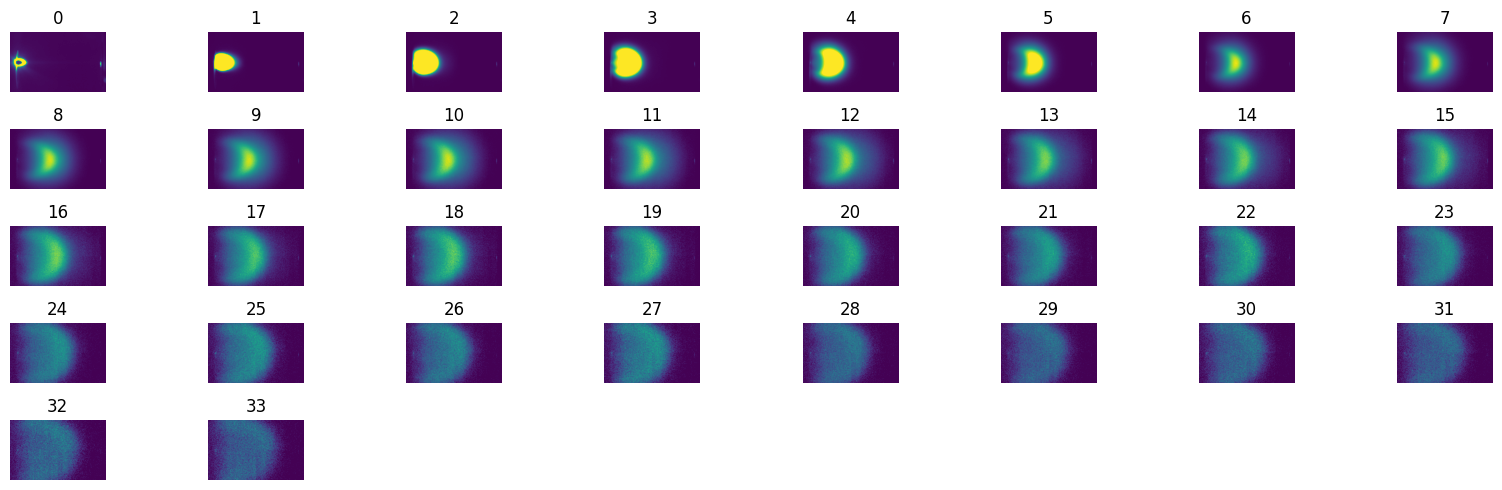

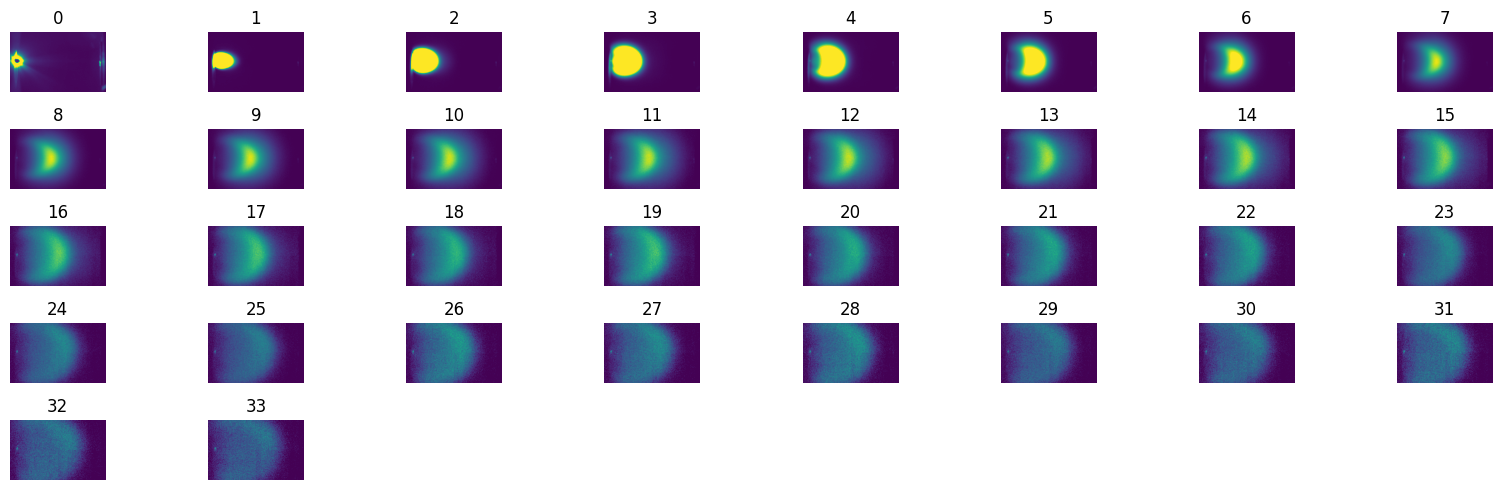

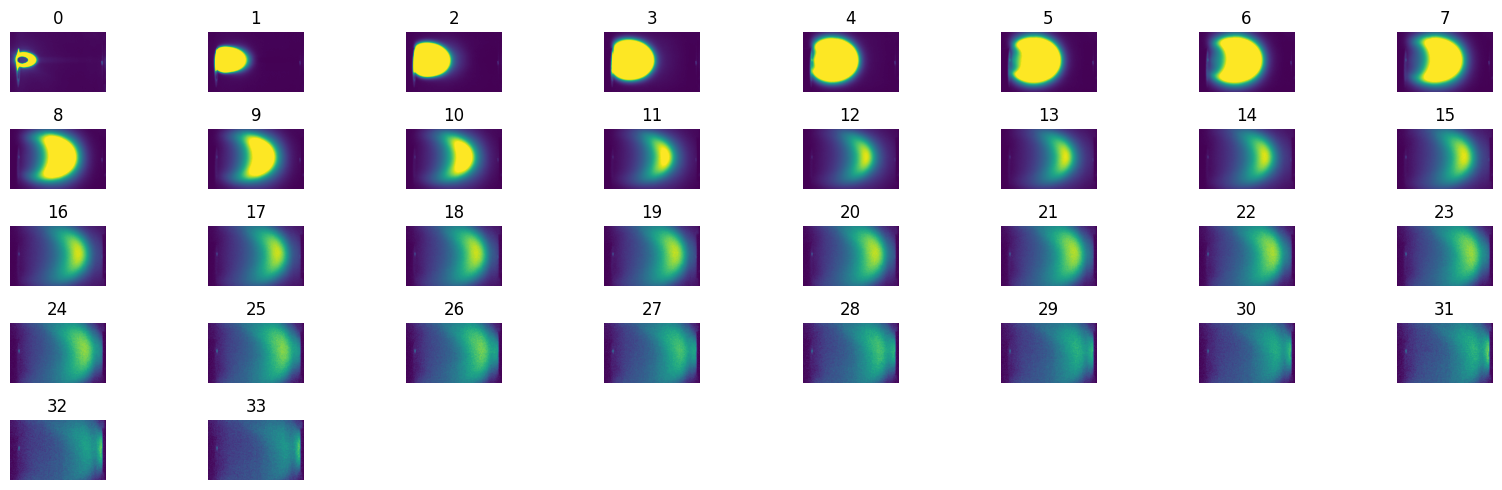

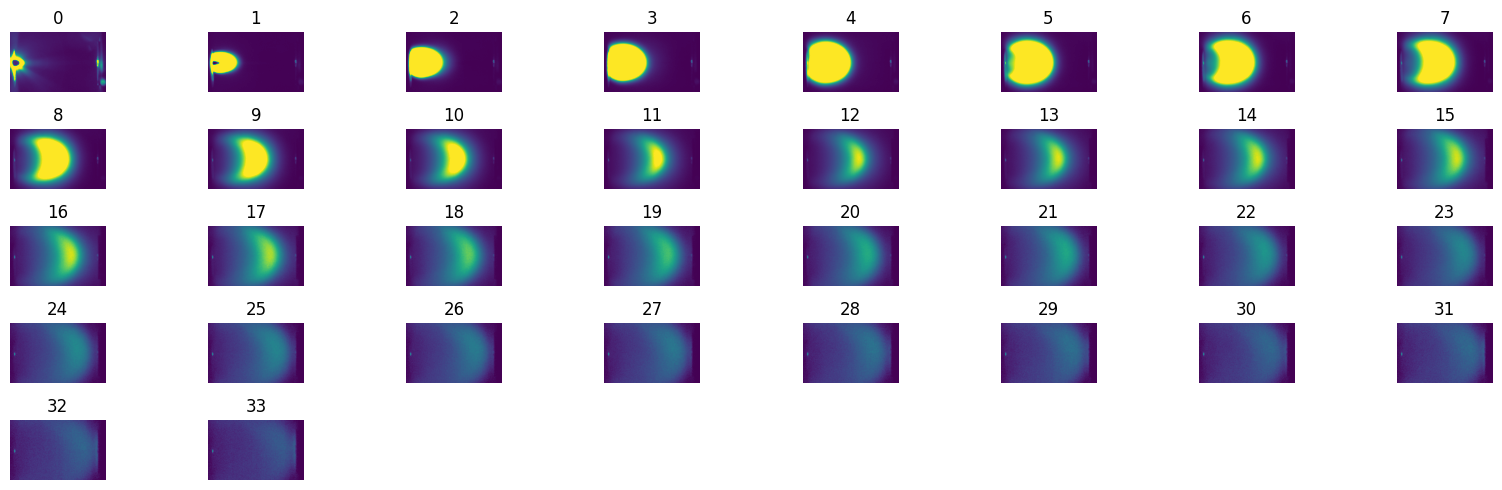

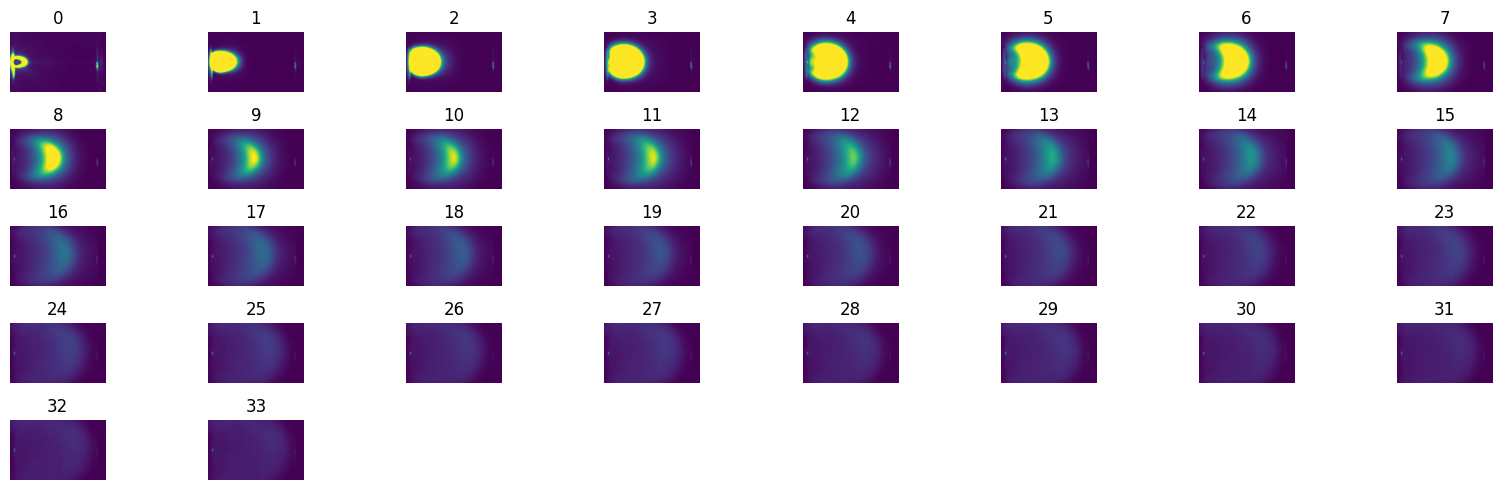

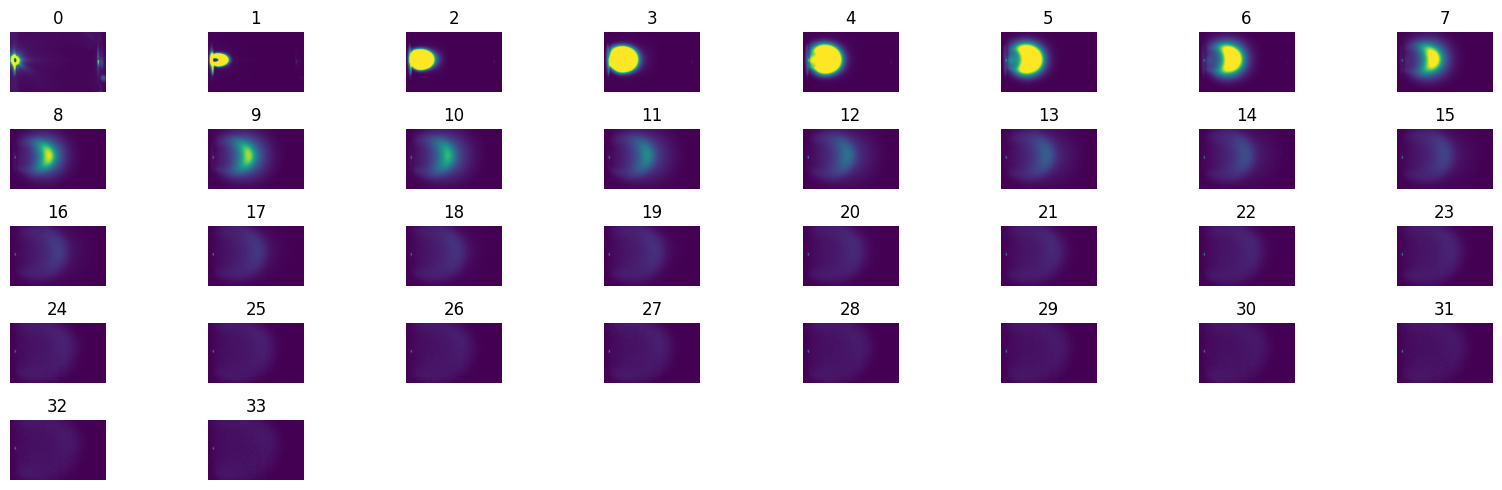

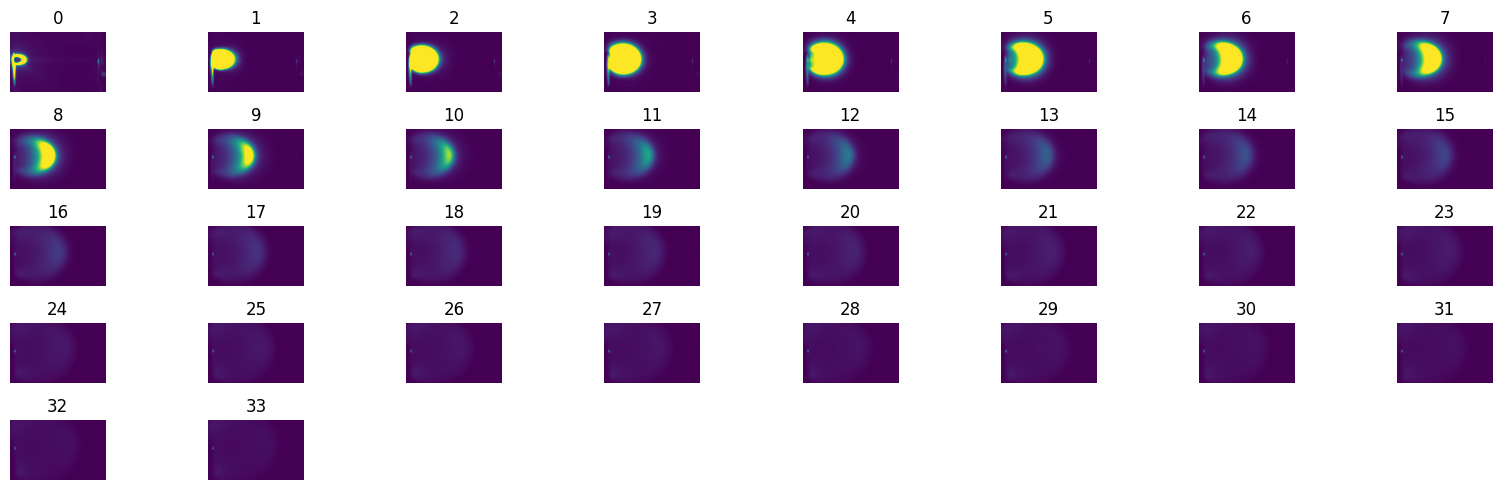

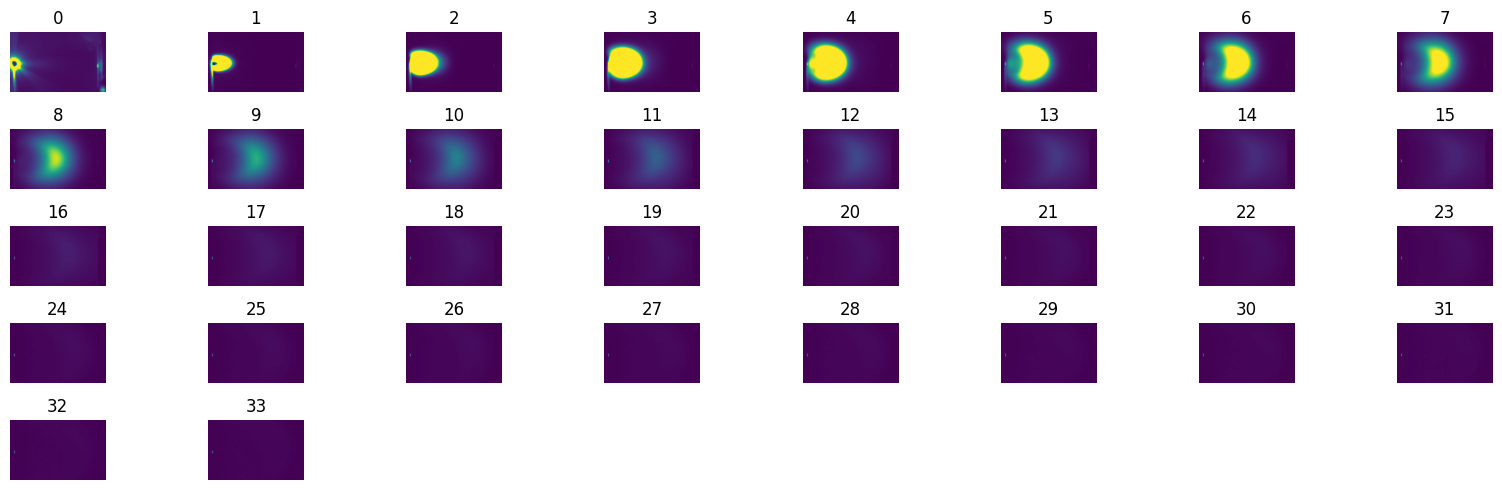

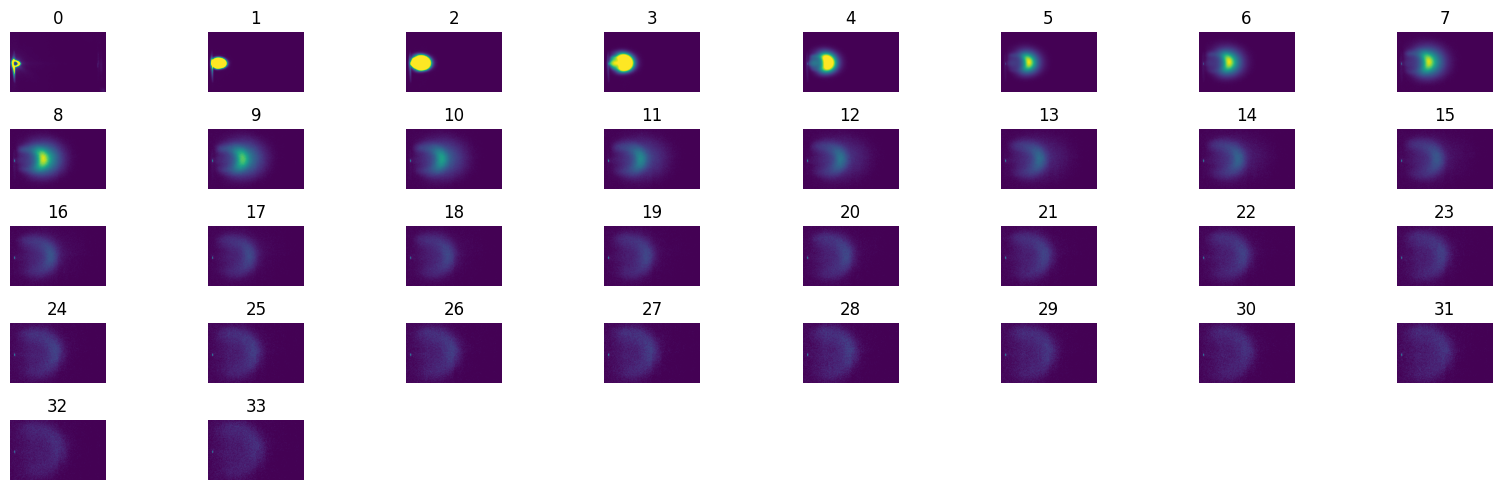

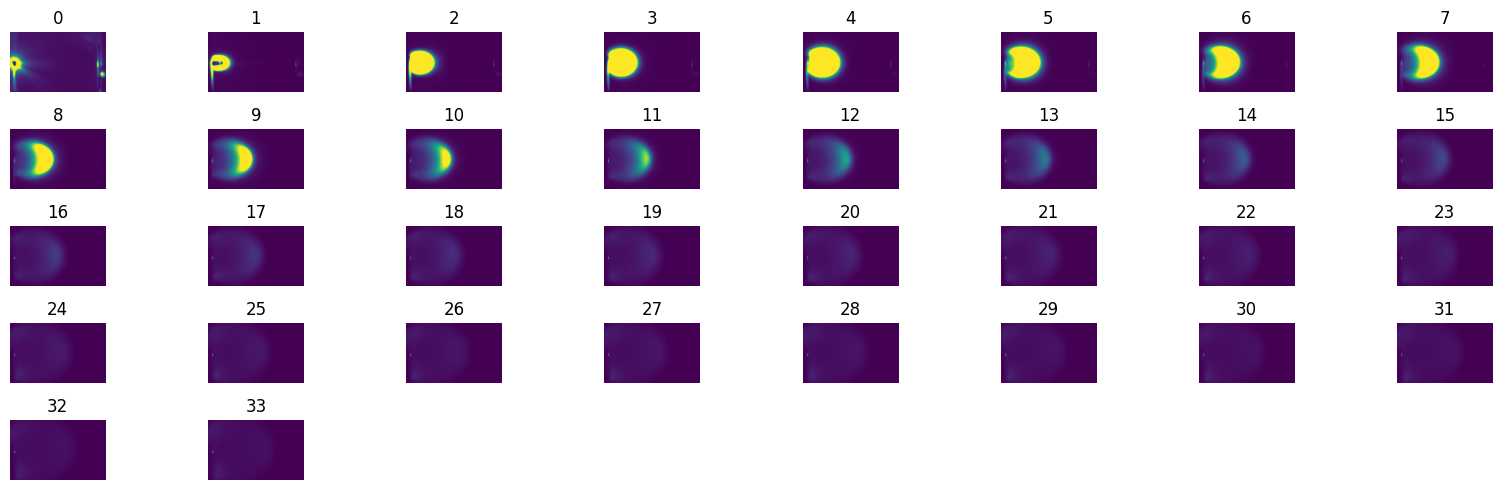

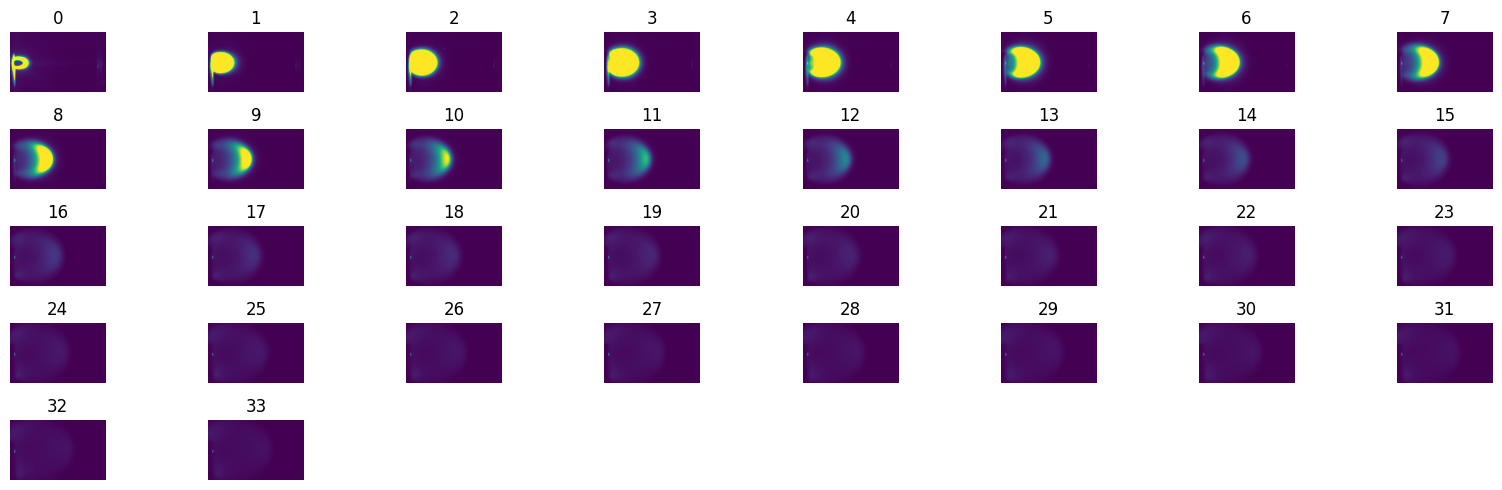

In [8]:
for file in files_train:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    plumes = plume_ds.load_plumes('1-SrRuO3')[5,2:36]
    show_images(plumes)
    plt.show()

#### add analytical plume dynamics

In [7]:
selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
make_dataset(target_file, input_files=files_train, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
make_dataset(target_file, input_files=files_test, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

(374, 128, 250, 400) uint8 0 255 2812
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156
../../../datasets/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5
125
../../../datasets/SRO_STO_Drexel\YG047_YichenGuo_05172024.h5
94
../../../datasets/SRO_STO_Drexel\YG051_YichenGuo_06122024.h5
189
../../../datasets/SRO_STO_Drexel\YG053_YichenGuo_06172024.h5
219
../../../datasets/SRO_STO_Drexel\YG057_YichenGuo_06282024.h5
282
../../../datasets/SRO_STO_Drexel\YG058_YichenGuo_06292024.h5
376
../../../datasets/SRO_STO_Drexel\YG059_YichenGuo_07012024.h5
314
../../../datasets/SRO_STO_Drexel\YG060_YichenGuo_07032024.h5
306
../../../datasets/SRO_STO_Drexel\YG061_YichenGuo_07042024.h5
377
../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374
(219, 128, 250, 400) uint8 0 255 219
../../../datasets/SRO_STO_Drexel\YG056_YichenGuo_06282024.h5
219


In [8]:
csv_train = ['../../../datasets/SRO_plume_metrics/YG045_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG046_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG047_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG051_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG053_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG057_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG058_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG059_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG060_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG061_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG062_metrics.csv']
csv_test = ['../../../datasets/SRO_plume_metrics/YG056_metrics.csv']



max_area_list, max_velocity_list = [], []
for csv_file in csv_train:
    df = pd.read_csv(csv_file)
    df_filtered = df[df['Threshold'] == '200']
    result_df = df_filtered.groupby('plume_index').agg({'Area': 'max', 'Velocity': 'max'}).reset_index()
    result_df.columns = ['plume_index', 'max_Area', 'max_Velocity']
    max_Area = result_df['max_Area'].values
    max_Velocity = result_df['max_Velocity'].values
    print(max_Area.shape, max_Velocity.shape)
    max_area_list.append(max_Area)
    max_velocity_list.append(max_Velocity)

max_area = np.concatenate(max_area_list)
max_velocity = np.concatenate(max_velocity_list)
print(max_area.shape, max_velocity.shape)

# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('max_area', data=max_area)
    f.create_dataset('max_velocity', data=max_velocity)


max_area_list, max_velocity_list = [], []
for csv_file in csv_test:
    df = pd.read_csv(csv_file)
    df_filtered = df[df['Threshold'] == '200']
    result_df = df_filtered.groupby('plume_index').agg({'Area': 'max', 'Velocity': 'max'}).reset_index()
    result_df.columns = ['plume_index', 'max_Area', 'max_Velocity']
    max_Area = result_df['max_Area'].values
    max_Velocity = result_df['max_Velocity'].values
    print(max_Area.shape, max_Velocity.shape)
    max_area_list.append(max_Area)
    max_velocity_list.append(max_Velocity)

max_area = np.concatenate(max_area_list)
max_velocity = np.concatenate(max_velocity_list)
print(max_area.shape, max_velocity.shape)

# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('max_area', data=max_area)
    f.create_dataset('max_velocity', data=max_velocity)

(156,) (156,)
(125,) (125,)
(94,) (94,)
(189,) (189,)
(219,) (219,)
(282,) (282,)
(376,) (376,)
(314,) (314,)
(306,) (306,)
(377,) (377,)
(374,) (374,)
(2812,) (2812,)
(219,) (219,)
(219,) (219,)


In [9]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

../../../datasets/MultiParams_2_36frames_analytical_train.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (2812, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (2812, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "growth_rate(angstrom_per_pulse)": shape (2812, 1), type "<f4">
   growth_rate(nm_per_min) <HDF5 dataset "growth_rate(nm_per_min)": shape (2812, 1), type "<f4">
   labels <HDF5 dataset "labels": shape (2812, 3), type "<f4">
   max_area <HDF5 dataset "max_area": shape (2812,), type "<f8">
   max_velocity <HDF5 dataset "max_velocity": shape (2812,), type "<f8">
   plumes <HDF5 dataset "plumes": shape (2812, 34, 250, 400), type "|u1">
../../../datasets/MultiParams_2_36frames_analytical_test.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (219, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape 

In [18]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'r') as f:
    max_area_train = np.array(f['max_area'])
    max_velocity_train = np.array(f['max_velocity'])
    labels_train = np.array(f['labels'])

labels_all = np.concatenate([labels_train, max_area_train.reshape(-1, 1), max_velocity_train.reshape(-1, 1)], axis=1)
print(labels_all.shape)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('labels_all', data=labels_all)

(2812, 5)


In [19]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'r') as f:
    max_area_test = np.array(f['max_area'])
    max_velocity_test = np.array(f['max_velocity'])
    labels_test = np.array(f['labels'])

labels_all = np.concatenate([labels_test, max_area_test.reshape(-1, 1), max_velocity_test.reshape(-1, 1)], axis=1)
print(labels_all.shape)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('labels_all', data=labels_all)

(219, 5)


In [20]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'r') as f:
    labels_all_train = np.array(f['labels_all'])
print(labels_all_train.shape)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'r') as f:
    labels_all_test = np.array(f['labels_all'])
print(labels_all_test.shape)

labels_all_all = np.concatenate([labels_all_train, labels_all_test])

(2812, 5)
(219, 5)


In [25]:
normalizer = EqualRangeNormalizer()
normalizer.fit(labels_all_all)
normalized_labels_all_all= normalizer.transform(labels_all_all)
normalized_labels_all_train = normalized_labels_all_all[:len(labels_all_train)]
normalized_labels_all_test = normalized_labels_all_all[len(labels_all_train):]
print(normalized_labels_all_train.shape, normalized_labels_all_test.shape)

Original labels stats:
Min: [5.00000000e+01 8.00000012e-01 1.89999994e-02 0.00000000e+00
 0.00000000e+00]
Max: [1.50000000e+02 2.04999995e+00 1.12000003e-01 3.10720000e+04
 2.08000000e+08]
Mean: [8.92362257e+01 1.51902886e+00 4.96022266e-02 1.47534256e+04
 1.12945563e+08]
Std: [2.95236394e+01 3.36006588e-01 2.19153421e-02 5.71617007e+03
 2.64495437e+07]

Normalized labels stats:
Min: [0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1.]
Mean: [0.39236226 0.5752231  0.32905619 0.47481416 0.54300751]
Std: [0.29523639 0.26880528 0.23564883 0.18396531 0.12716127]
(2812, 5) (219, 5)


In [26]:
# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels_all_train', data=normalized_labels_all_train)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels_all_test', data=normalized_labels_all_test)

In [27]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys(): 
        print('  ', k, f[k])

../../../datasets/MultiParams_2_36frames_analytical_train.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (2812, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (2812, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "growth_rate(angstrom_per_pulse)": shape (2812, 1), type "<f4">
   growth_rate(nm_per_min) <HDF5 dataset "growth_rate(nm_per_min)": shape (2812, 1), type "<f4">
   labels <HDF5 dataset "labels": shape (2812, 3), type "<f4">
   labels_all <HDF5 dataset "labels_all": shape (2812, 5), type "<f8">
   max_area <HDF5 dataset "max_area": shape (2812,), type "<f8">
   max_velocity <HDF5 dataset "max_velocity": shape (2812,), type "<f8">
   normalized_labels_all_train <HDF5 dataset "normalized_labels_all_train": shape (2812, 5), type "<f8">
   plumes <HDF5 dataset "plumes": shape (2812, 34, 250, 400), type "|u1">
../../../datasets/MultiParams_2_36frames_analytical_test.h5
   Fluenc

#### multi params dataset

In [6]:
selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
make_dataset(target_file, input_files=files_train, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
make_dataset(target_file, input_files=files_test, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

(374, 128, 250, 400) uint8 0 255 2812
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156
../../../datasets/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5
125
../../../datasets/SRO_STO_Drexel\YG047_YichenGuo_05172024.h5
94
../../../datasets/SRO_STO_Drexel\YG051_YichenGuo_06122024.h5
189
../../../datasets/SRO_STO_Drexel\YG053_YichenGuo_06172024.h5
219
../../../datasets/SRO_STO_Drexel\YG057_YichenGuo_06282024.h5
282
../../../datasets/SRO_STO_Drexel\YG058_YichenGuo_06292024.h5
376
../../../datasets/SRO_STO_Drexel\YG059_YichenGuo_07012024.h5
314
../../../datasets/SRO_STO_Drexel\YG060_YichenGuo_07032024.h5
306
../../../datasets/SRO_STO_Drexel\YG061_YichenGuo_07042024.h5
377
../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374
(219, 128, 250, 400) uint8 0 255 219
../../../datasets/SRO_STO_Drexel\YG056_YichenGuo_06282024.h5
219


In [18]:
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
with h5py.File(target_file, 'r') as f:
    labels_train = np.array(f['labels'])
print(labels_train.shape)

target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
with h5py.File(target_file, 'r') as f:
    labels_test = np.array(f['labels'])
print(labels_test.shape)

(2812, 3)
(219, 3)


In [19]:
labels = np.concatenate((labels_train, labels_test))

In [20]:
# Create and fit the normalizer
normalizer = EqualRangeNormalizer()
normalizer.fit(labels)

# Normalize the labels
normalized_labels = normalizer.transform(labels)

labels_train = normalized_labels[:len(labels_train)]
labels_test = normalized_labels[len(labels_train):]

Original labels stats:
Min: [5.0e+01 8.0e-01 1.9e-02]
Max: [1.50e+02 2.05e+00 1.12e-01]
Mean: [8.9236229e+01 1.5190604e+00 4.9602795e-02]
Std: [2.9523737e+01 3.3600909e-01 2.1915358e-02]

Normalized labels stats:
Min: [0. 0. 0.]
Max: [1. 1. 1.]
Mean: [0.39236227 0.57522595 0.32905406]
Std: [0.29523355 0.2688057  0.23564732]


In [21]:
# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels', data=labels_train)

# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels', data=labels_test)

In [24]:
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

../../../datasets/MultiParams_2_36frames_train.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (2812, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (2812, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "growth_rate(angstrom_per_pulse)": shape (2812, 1), type "<f4">
   growth_rate(nm_per_min) <HDF5 dataset "growth_rate(nm_per_min)": shape (2812, 1), type "<f4">
   labels <HDF5 dataset "labels": shape (2812, 3), type "<f4">
   normalized_labels <HDF5 dataset "normalized_labels": shape (2812, 3), type "<f4">
   plumes <HDF5 dataset "plumes": shape (2812, 34, 250, 400), type "|u1">
../../../datasets/MultiParams_2_36frames_test.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (219, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (219, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "gro

## multiple parameters before normalize

In [11]:
selected_frame = (2, 36)

length = 0
for file in files_train:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/MultiParams_2_36frames_train.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 34, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Pressure (mTorr)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Fluence (J/cm2)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('labels', shape=(length, 3), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_train):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:, selected_frame[0]:selected_frame[1]]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['Pressure (mTorr)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0]
        f['Fluence (J/cm2)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0]
        
        labels = np.array([df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]])
        f['labels'][index:index+len(plumes)] = labels
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

length = 0
for file in files_test:
    print(file)
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
    print(len(plumes))
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/MultiParams_2_36frames_test.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 34, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Pressure (mTorr)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Fluence (J/cm2)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('labels', shape=(length, 3), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_train):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:, selected_frame[0]:selected_frame[1]]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['Pressure (mTorr)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0]
        f['Fluence (J/cm2)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0]
        
        labels = np.array([df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['growth_rate(angstrom_per_pulse)'].values[0]])
        f['labels'][index:index+len(plumes)] = labels
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

(374, 128, 250, 400) uint8 0 255 2812
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156


KeyError: 'growth_rate (Å/pulse)'

In [7]:
length = 0
for file in files_train:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/growth_rate_regression_ds_2_26frames_train.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 24, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_train):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:,2:26]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

(377, 128, 250, 400) uint8 0 255 2657
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156
../../../datasets/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5
125
../../../datasets/SRO_STO_Drexel\YG047_YichenGuo_05172024.h5
94
../../../datasets/SRO_STO_Drexel\YG051_YichenGuo_06122024.h5
189
../../../datasets/SRO_STO_Drexel\YG053_YichenGuo_06172024.h5
219
../../../datasets/SRO_STO_Drexel\YG056_YichenGuo_06282024.h5
219
../../../datasets/SRO_STO_Drexel\YG057_YichenGuo_06282024.h5
282
../../../datasets/SRO_STO_Drexel\YG058_YichenGuo_06292024.h5
376
../../../datasets/SRO_STO_Drexel\YG059_YichenGuo_07012024.h5
314
../../../datasets/SRO_STO_Drexel\YG060_YichenGuo_07032024.h5
306
../../../datasets/SRO_STO_Drexel\YG061_YichenGuo_07042024.h5
377


In [8]:
length = 0
for file in files_test:
    print(file)
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
    print(len(plumes))
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/growth_rate_regression_ds_2_26frames_test.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 24, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_test):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:,2:26]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374
(374, 128, 250, 400) uint8 0 255 374
../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374


#### full range

In [ ]:
with h5py.File('../../../datasets/growth_rate_regression_ds.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 128, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)